### Regression

In [ ]:
#---#| default_exp statistics.regression

In [ ]:
from alphabase.statistics.regression import *

In [ ]:
#| hide
import matplotlib.pyplot as plt

In [ ]:
#|hide
from nbdev.showdoc import show_doc

In [ ]:
show_doc(LOESSRegression.fit)

---

[source](https://github.com/MannLabs/alphabase/blob/main/alphabase/statistics/regression.py#L85){target="_blank" style="float:right; font-size:smaller"}

### LOESSRegression.fit

>      LOESSRegression.fit (x:numpy.ndarray, y:numpy.ndarray)

fit the model passed on provided training data.

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| x | ndarray | float, of shape (n_samples,) or (n_samples, 1), Training data. Note that only a single feature is supported at the moment. |
| y | ndarray | of shape (n_samples,) or (n_samples, 1) Target values. |
| **Returns** | **self: object** | **Returns the fitted estimator.** |

In [ ]:
show_doc(LOESSRegression.predict)

---

[source](https://github.com/MannLabs/alphabase/blob/main/alphabase/statistics/regression.py#L184){target="_blank" style="float:right; font-size:smaller"}

### LOESSRegression.predict

>      LOESSRegression.predict (x:numpy.ndarray)

Predict using the LOESS model.

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| x | ndarray | float, of shape (n_samples,) or (n_samples, 1) Feature data. Note that only a single feature is supported at the moment. |
| **Returns** | **numpy.ndarray, float** |  |

### Application example

In [ ]:
#| hide
check_estimator(LOESSRegression())

/Users/georgwallmann/miniconda3/envs/alphadia/lib/python3.8/site-packages/sklearn/utils/estimator_checks.py:290: SkipTestWarning: Can't test estimator LOESSRegression which requires input  of type ['1darray']
  warnings.warn(


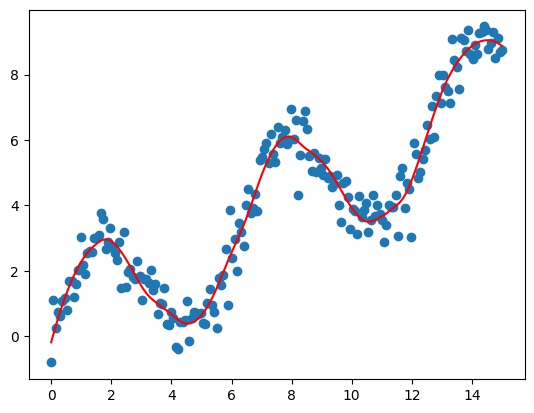

In [ ]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
def noisy_1d(x):
    y = np.sin(x)
    y_err = np.random.normal(y,0.5)
    return y + y_err + 0.5 * x

x_train = np.linspace(0,15,200)
y_train = noisy_1d(x_train)

x_test = np.linspace(0,15,200)
y_test = LOESSRegression().fit(x_train, y_train).predict(x_test)

plt.scatter(x_train,y_train)
plt.plot(x_test,y_test,c='r')
plt.show()

### Weight function

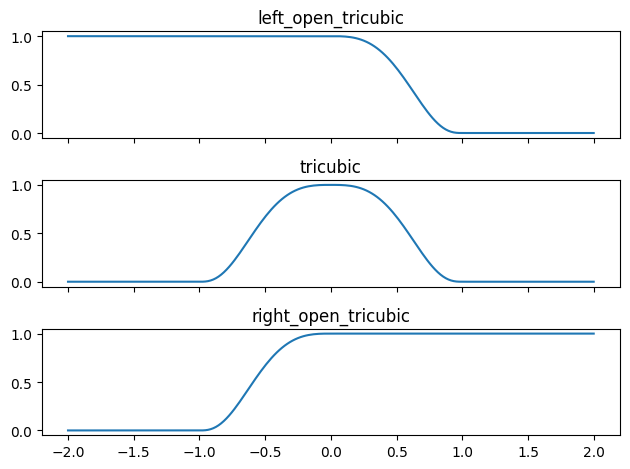

In [ ]:
fig, axs = plt.subplots(nrows=3,sharex=True)

x = np.linspace(-2,2,200)
y = left_open_tricubic(x)
axs[0].plot(x,y)
axs[0].set_title('left_open_tricubic')

x = np.linspace(-2,2,200)
y = tricubic(x)
axs[1].plot(x,y)
axs[1].set_title('tricubic')

x = np.linspace(-2,2,200)
y = right_open_tricubic(x)
axs[2].plot(x,y)
axs[2].set_title('right_open_tricubic')

fig.tight_layout()
plt.show()

#| hide
### Unit Tests for Edge Cases

In [ ]:
#| hide

def noisy_1d(x):
    y = np.sin(x)
    y_err = np.random.normal(y,0.5)
    return y + y_err + 0.5 * x

# To few datapoints for choosen number of kernels

x_train = np.linspace(0,15,6)
y_train = noisy_1d(x_train)
x_test = np.linspace(0,15,10)
y_test = LOESSRegression(n_kernels=4, polynomial_degree=2).fit(x_train, y_train).predict(x_test)

# Extrapolation

x_train = np.linspace(0,15,60)
y_train = noisy_1d(x_train)
x_test = np.linspace(-10,25,10)
y_test = LOESSRegression(n_kernels=4, polynomial_degree=2).fit(x_train, y_train).predict(x_test)



# single datapoint inference

x_train = np.linspace(0,15,100)
y_train = noisy_1d(x_train)
x_test = np.linspace(10,10,1)
y_test = LOESSRegression(n_kernels=4, polynomial_degree=2).fit(x_train, y_train).predict(x_test)

# extrapolation when no other points are interpolated

x_train = np.linspace(0,15,60)
y_train = y = np.sin(x_train)
x_test = np.linspace(-2,-1,1)
y_test = LOESSRegression(n_kernels=4, polynomial_degree=2).fit(x_train, y_train).predict(x_test)
assert (-2.604 - y_test) < 0.01

Curve fitting with 4 kernels and polynomials of 2 degree requires at least 12 datapoints.
Number of kernels will be reduced to 2 kernels.
